
# Tutorial 4 - Calculating Significance by Monte Carlo

In the homework you should have found the correlation coefficients for some data.  
The Pearson Correlation Coefficient is
\begin{align}
r_{xy} = \frac{1}{N}\frac{ \sum_i (x_i - \bar{x} ) (y_i - \bar{y}) }{ \sqrt{ S^2_x S^2_y} }
\end{align}
where
\begin{align}
\bar{x} = \frac{1}{N}\sum_i x_i ~~~~ S^2_x = \frac{1}{(N-1)} \sum_i ( x_i - \bar{x} )
\end{align}

A non-zero $r_{xy}$ should indicate that there is a correlation between $x$ and $y$.
$r_{xy}$ is an estimator of the populations true correlation coefficient
\begin{align}
\rho_{xy} = \frac{C_{XY}}{\sqrt{\sigma^2_x \sigma_y^2} }
\end{align}

But $r_{xy}$ is a function of random variables so we would not expect it to be exactly 0 
even if there were no correlations.  We could try to calculate the probability distribution of 
$r_{xy}$ analytically, but this might be difficult (more on this in lecture).

##  Monte Carlo

Instead lets find the significance of your measured $r_{xy}$ by Monte Carlo given the hypothesis that 
$x$ and $y$ are not correlated.


1. Create two vectors (X and Y) of random normally distributed numbers with variance 1 and mean zero.  Each vector should be 1000 elements long as was the data in the homework.  Calculate $r_{xy}$ for these.  X and Y 
are uncorrelated since they where generated independently.

2. Repeat step 1 a thousand times to get a distribution of $r_{xy}$.  You should to this in a loop.  There is no reason to save all the X's and Y's.

3. Plot a histogram of your  $r_{xy}$ values.  Does it look Gaussian?

4. What is the fraction of times $|r_{xy}|$ is larger than 0.025, 0.05, 0.08?  Would you expect to get this value if there were no correlation? Calculate the rxy for the homework set homework_01_2d-datafile.csv?  Would you expect to get this value if there were no correlation?

5. Do the exercise above over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y variables.   Plot the new histogram of $r_{xy}$ over the old one.   Is there a difference or is the distribution of $r_{xy}$ independent of the averages and variances of the distributions?

6. Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability distribution is larger than it.  For example the 95\% upper bound would be at $i/N = 0.95$.  What is the 95\% upper bound on $r_{xy}$ if there is no correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
In lecture we will find that the variance in this estimator is
\begin{align}
Var[r_p] = \frac{2 p (1-p) }{N f(r_p)^2 }
\end{align}
for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one you measure, what is the variance in your estimate of $r_{0.95}$?

7. Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  There are Python functions for calculating them efficiently.  These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ (in this case Gaussian) and are thus more widely applicable.  Do they indicate that the data in the home work is correlated?


In [21]:
#Tutorial # 04
## Calculating Significance by Monte Carlo
##
## More complete directions for this tutorial are in tut4.pdf
##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
%matplotlib inline 
np.random.seed(42)
#1) Calculate two vectors (X and Y) of random normally distributed numbers 
#   with variance 1 and mean zero.  Each vector should be 1000 elements long 
#   as was the data in the homework.  Calculate $r_{xy}$ for these.
size=1000
X=np.random.normal(loc=0,scale=1,size=size)
Y=np.random.normal(loc=0,scale=1,size=size)
Sxsq=np.sum((X-np.mean(X))**2)/(size-1)
Sysq=np.sum((Y-np.mean(Y))**2)/(size-1)
rxy=np.sum((X-np.mean(X))*(Y-np.mean(Y)))/(size*np.sqrt(Sxsq*Sysq))
print(rxy)

-0.04035947142215071


In [30]:
#2) Repeat step 1 a thousand times to get a distribution of $r_{xy}$ for a sample 
#   size equal to that of the homework.
iterations=1000
rxy_1=np.empty(iterations)
for i in range(iterations):
    X_1=np.random.normal(loc=0,scale=1,size=size)
    Y_1=np.random.normal(loc=0,scale=1,size=size)
    Sxsq=np.sum((X_1-np.mean(X_1))**2)/(size-1)
    Sysq=np.sum((Y_1-np.mean(Y_1))**2)/(size-1)
    rxy_1[i]=np.sum((X_1-np.mean(X_1))*(Y_1-np.mean(Y_1)))/(size*np.sqrt(Sxsq*Sysq))    

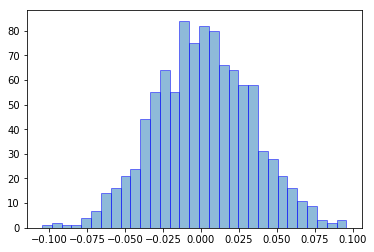

In [31]:
#3) Plot a histogram of your  $r_{xy}$ values.
plt.hist(rxy_1,bins=int(np.sqrt(len(rxy_1))),alpha=0.5,edgecolor='blue')
plt.show()

In [32]:
#4) What is the fraction of times $|r_{xy}|$ is larger than your measured value 
#   for homework_01_2d-datafile.csv ?  Would you expect to find this if there 
#   were no correlation?
frac_0025=sum(np.abs(rxy_1)>0.025)/iterations
print('The fraction of times |rxy| of random normal distributed values is larger than 0.025 is '+str(frac_0025))
frac_005=sum(np.abs(rxy_1)>0.05)/iterations
print('The fraction of times |rxy| of random normal distributed values is larger than 0.05 is '+str(frac_005))
frac_008=sum(np.abs(rxy_1)>0.08)/iterations
print('The fraction of times |rxy| of random normal distributed values is larger than 0.08 is '+str(frac_008))
print('The fraction decreases if |rxy| increases, this means that the variables are not correlated, because a very small    fraction of iterations will generate a |rxy| close to 1')
print( )
print('And now the same thing will be done using the data from homework_01_2d-datafile.csv')
data_2d=pd.read_csv('homework_01_2d-datafile.csv')
#print(data_2d.head())
X_2=data_2d['X']
Y_2=data_2d['Y']
Sxsq_2=np.sum((X_2-np.mean(X_2))**2)/(len(X_2)-1)
Sysq_2=np.sum((Y_2-np.mean(Y_2))**2)/(len(Y_2)-1)
rxy_2=np.sum((X_2-np.mean(X_2))*(Y_2-np.mean(Y_2)))/(len(X_2)*np.sqrt(Sxsq_2*Sysq_2))
print('The value of rxy for homework_01_2d-datafile.csv is ' +str(rxy_2))
frac_rxy_home=sum(np.abs(rxy_1)>rxy_2)/iterations
print('The fraction of times |rxy| of random normal distributed values is larger than the value of |rxy| calculate using the data from homework_01_2d-datafile.csv is '+str(frac_rxy_home))
#I tried to perform 1 milion iterations, but this last fraction has always a value of 0.0
print('The variables from the homework csv file are correlated. It is nearly impossible for two random variables to have the same |rxy| of the correlated ones.')




The fraction of times |rxy| of random normal distributed values is larger than 0.025 is 0.447
The fraction of times |rxy| of random normal distributed values is larger than 0.05 is 0.121
The fraction of times |rxy| of random normal distributed values is larger than 0.08 is 0.01
The fraction decreases if |rxy| increases, this means that the variables are not correlated, because a very small    fraction of iterations will generate a |rxy| close to 1

And now the same thing will be done using the data from homework_01_2d-datafile.csv
The value of rxy for homework_01_2d-datafile.csv is 0.9484965806973131
The fraction of times |rxy| of random normal distributed values is larger than the value of |rxy| calculate using the data from homework_01_2d-datafile.csv is 0.0
The variables from the homework csv file are correlated. It is nearly impossible for two random variables to have the same |rxy| of the correlated ones.


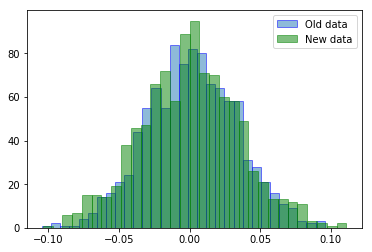

The two histograms show that there is no dependence on the mean and the variance of the variables in the value of    rxy, as long as the variables are generated as normally distributed


In [16]:
#5) Do the exersize over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ 
#   and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y 
#   variables.  Does this make any difference?
mean_X_2=np.mean(X_2)
mean_Y_2=np.mean(Y_2)
std_X_2=np.std(X_2)
std_Y_2=np.std(Y_2)
rxy_3=np.empty(iterations)
for i in range(iterations):
    X_3=np.random.normal(loc=mean_X_2,scale=std_X_2,size=len(X_2))
    Y_3=np.random.normal(loc=mean_Y_2,scale=std_Y_2,size=len(Y_2))
    Sxsq_3=np.sum((X_3-np.mean(X_2))**2)/(len(X_3)-1)
    Sysq_3=np.sum((Y_3-np.mean(Y_2))**2)/(len(Y_3)-1)
    rxy_3[i]=np.sum((X_3-np.mean(X_2))*(Y-np.mean(Y_2)))/(len(X_3)*np.sqrt(Sxsq_3*Sysq_3))
plt.hist(rxy_1,bins=int(np.sqrt(len(rxy_1))),alpha=0.5,edgecolor='blue',label='Old data')
plt.hist(rxy_3,bins=int(np.sqrt(len(rxy_3))),alpha=0.5,color='green',edgecolor='green',label='New data')
plt.legend()
plt.show()
print('The two histograms show that there is no dependence on the mean and the variance of the variables in the value of    rxy, as long as the variables are generated as normally distributed')

In [22]:
#6) Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th 
#   value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability 
#   distribution is larger than it.  For example the 95\% upper bound would be 
#   at i/N = 0.95.  What is the 95% upper bound on $r_{xy}$ if there is not 
#   correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
#   In lecture we will find that the variance in this estimator is
#
#   Var[r_p] = \frac{ 2 p (1-p) }{N f(r_p)^2 }
#
#   for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
#   Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one 
#   you measure, what is the variance in your estimate of $r_{0.95}$?
percent=0.95
sorted_rxy=np.sort(rxy_1)
i=int(percent*iterations)
rxy_095=sorted_rxy[i]
print('The five percent of the values in the rxy distribution is above rxy= '+str(rxy_095))
var_rxy_095=2*percent*(1-percent)/(iterations*(ss.norm.pdf(rxy_095, loc=np.mean(rxy_1),scale=np.std(rxy_1)))**2)
print('The variance of this value of rxy is '+str(var_rxy_095))

The five percent of the values in the rxy distribution is above rxy= 0.05537390291239271
The variance of this value of rxy is 1.039651961184568e-05


The Spearman correlation coefficient for the first two randomly generated variables is -0.06376473976473977
The Kendall correlation coefficient for the first two randomly generated variables is -0.04382782782782783

Now the program will show the distribution of the two coefficients as it has been done for rxy in point 3: 


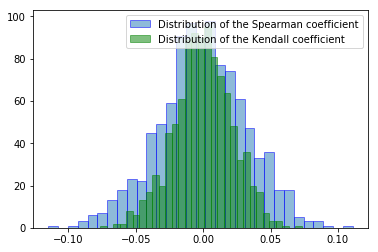


The Spearman coefficient for the data in the homework is 0.9404303804303806
The Kendall coefficient for the data in the homework is 0.7919839839839841
These two values surely indicate a correlation, in particular the Spearman coefficient is very close to one, even if both are minor to rxy


In [44]:
#7) Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  
#   There are Python functions for calculating them efficiently.  
#   These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ 
#   (in this case Gaussian) and are thus more widely applicable.  
#   Do they indicate that the data in the home work is correlated?
rho,pvalsp=ss.spearmanr(X,Y)
print('The Spearman correlation coefficient for the first two randomly generated variables is '+str(rho))
tau,pvalke=ss.kendalltau(X,Y)
print('The Kendall correlation coefficient for the first two randomly generated variables is '+str(tau))
print( )


print('Now the program will show the distribution of the two coefficients as it has been done for rxy in point 3: ')
rho_1=np.empty(iterations)
tau_1=np.empty(iterations)
for i in range(iterations):
    X_4=np.random.normal(loc=0,scale=1,size=size)
    Y_4=np.random.normal(loc=0,scale=1,size=size)
    rho_1[i],pvalsp_1=ss.spearmanr(X_4,Y_4)
    tau_1[i],pvalken_1=ss.kendalltau(X_4,Y_4)
plt.hist(rho_1,bins=int(np.sqrt(len(rho_1))),alpha=0.5,edgecolor='blue',label='Distribution of the Spearman coefficient')
plt.hist(tau_1,bins=int(np.sqrt(len(tau_1))),alpha=0.5,color='green',edgecolor='green',label='Distribution of the Kendall coefficient')
plt.legend()
plt.show()
print()


rho_2,pvalsp_2=ss.spearmanr(X_2,Y_2)
print('The Spearman coefficient for the data in the homework is '+str(rho_2))
tau_2,pvalke_2=ss.kendalltau(X_2,Y_2)
print('The Kendall coefficient for the data in the homework is '+str(tau_2))
print('These two values surely indicate a correlation, in particular the Spearman coefficient is very close to one, even if both are minor to rxy')